# UFC Predictor

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import config

In [139]:
import warnings
warnings.filterwarnings('ignore')

In [140]:
pd.set_option("display.max_columns", None, "display.max_rows", None)

In [141]:
sns.set_palette('Set2')

## fight_stats

In [142]:
fight_stats = pd.read_csv(config.PATH + '/ufc-stats/data/scraped_data/fight_stats_raw.csv')

In [143]:
# url = 'mssql+pyodbc://localhost/ufc?driver=ODBC+Driver+18+for+SQL+Server&trusted_connection=yes&TrustServerCertificate=yes'

# engine = create_engine(url)

# query = "SELECT * FROM fight_stats"
# fight_stats = pd.read_sql(query, engine)

# fight_stats.head()

In [144]:
fight_stats.columns

Index(['Unnamed: 0', 'fighter_id', 'date', 'location', 'title', 'method',
       'round', 'time', 'time_format', 'ref', 'details', 'red_outcome',
       'blue_outcome', 'red_nickname', 'blue_nickname', 'red_fighter',
       'blue_fighter', 'red_fighter_kd', 'blue_fighter_kd',
       'red_fighter_sig_str', 'blue_fighter_sig_str',
       'red_fighter_sig_str_perc', 'blue_fighter_sig_str_perc',
       'red_fighter_total_str', 'blue_fighter_total_str', 'red_fighter_td',
       'blue_fighter_td', 'red_fighter_td_perc', 'blue_fighter_td_perc',
       'red_fighter_sub_att', 'blue_fighter_sub_att', 'red_fighter_rev',
       'blue_fighter_rev', 'red_fighter_ctrl', 'blue_fighter_ctrl',
       'red_fighter_sig_str_head', 'blue_fighter_sig_str_head',
       'red_fighter_sig_str_body', 'blue_fighter_sig_str_body',
       'red_fighter_sig_str_leg', 'blue_fighter_sig_str_leg',
       'red_fighter_sig_str_distance', 'blue_fighter_sig_str_distance',
       'red_fighter_sig_str_clinch', 'blue_fighter_si

In [145]:
def get_perc(x):
    
    y = x.split(' of ')
    
    if len(y) == 2:
        landed, total = int(y[0]), int(y[1])
    else:
        return np.nan
        
    if total > 0:
        return round(landed / total, 2)
    else:
        return 0

In [146]:
cols = ['blue_fighter_sig_str', 'red_fighter_sig_str',
        'blue_fighter_total_str', 'red_fighter_total_str',
        'blue_fighter_td', 'red_fighter_td',
        'blue_fighter_sig_str_head', 'red_fighter_sig_str_head',
        'blue_fighter_sig_str_body', 'red_fighter_sig_str_body',
        'blue_fighter_sig_str_leg', 'red_fighter_sig_str_leg',
        'blue_fighter_sig_str_distance', 'red_fighter_sig_str_distance',
        'blue_fighter_sig_str_clinch', 'red_fighter_sig_str_clinch',
        'blue_fighter_sig_str_ground', 'red_fighter_sig_str_ground']

for col in cols:
    fight_stats[col + '_perc'] = fight_stats[col].map(lambda x: get_perc(x))
    fight_stats[col + '_att'] = fight_stats[col].map(lambda x: int(x.split(' of ')[0]))

fight_stats.drop(columns=cols, inplace=True)

fight_stats.head()

,Unnamed: 0,fighter_id,date,location,title,method,round,time,time_format,ref,details,red_outcome,blue_outcome,red_nickname,blue_nickname,red_fighter,blue_fighter,red_fighter_kd,blue_fighter_kd,red_fighter_sig_str_perc,blue_fighter_sig_str_perc,red_fighter_td_perc,blue_fighter_td_perc,red_fighter_sub_att,blue_fighter_sub_att,red_fighter_rev,blue_fighter_rev,red_fighter_ctrl,blue_fighter_ctrl,blue_fighter_sig_str_att,red_fighter_sig_str_att,blue_fighter_total_str_perc,blue_fighter_total_str_att,red_fighter_total_str_perc,red_fighter_total_str_att,blue_fighter_td_att,red_fighter_td_att,blue_fighter_sig_str_head_perc,blue_fighter_sig_str_head_att,red_fighter_sig_str_head_perc,red_fighter_sig_str_head_att,blue_fighter_sig_str_body_perc,blue_fighter_sig_str_body_att,red_fighter_sig_str_body_perc,red_fighter_sig_str_body_att,blue_fighter_sig_str_leg_perc,blue_fighter_sig_str_leg_att,red_fighter_sig_str_leg_perc,red_fighter_sig_str_leg_att,blue_fighter_sig_str_distance_perc,blue_fighter_sig_str_distance_att,red_fighter_sig_str_distance_perc,red_fighter_sig_str_distance_att,blue_fighter_sig_str_clinch_perc,blue_fighter_sig_str_clinch_att,red_fighter_sig_str_clinch_perc,red_fighter_sig_str_clinch_att,blue_fighter_sig_str_ground_perc,blue_fighter_sig_str_ground_att,red_fighter_sig_str_ground_perc,red_fighter_sig_str_ground_att
0,0,0,"February 07, 2026","Las Vegas, Nevada, USA",Bantamweight Bout,Submission,2,4,5 Rnd (5-5-5-5-5),Herb Dean,Rear Naked Choke,W,L,NaN,"""LokDog""",Mario Bautista,Vinicius Oliveira,0,0,0.56,0.57,0.71,0.00,1,0,0,0,5:47,1:39,12,15,0.67,18,0.78,49,0,5,0.30,3,0.50,10,0.60,3,0.83,5,1.00,6,0.00,0,0.50,9,0.50,6,1.00,3,0.00,0,0.0,0,0.69,9
1,1,1,"February 07, 2026","Las Vegas, Nevada, USA",Flyweight Bout,Decision - Unanimous,3,5,3 Rnd (5-5-5),Keith Peterson,Eric Colon27 - 30.Junichiro Kamijo27 - 30.Ron ...,L,W,"""The Prince""","""Karate Kid""",Amir Albazi,Kyoji Horiguchi,0,0,0.24,0.54,0.00,0.00,0,0,0,0,3:50,1:02,73,16,0.61,99,0.27,20,0,0,0.53,65,0.19,12,0.50,3,0.80,4,0.71,5,0.00,0,0.53,71,0.20,12,0.67,2,0.67,4,0.0,0,0.00,0
2,2,2,"February 07, 2026","Las Vegas, Nevada, USA",Heavyweight Bout,Decision - Unanimous,3,5,3 Rnd (5-5-5),Dan Miragliotta,Mike Bell27 - 30.Sal D'amato27 - 30.Chris Lee2...,L,W,"""Malhadinho""",NaN,Jailton Almeida,Rizvan Kuniev,0,0,0.46,0.46,0.00,0.00,0,0,0,0,1:24,6:35,43,31,0.67,102,0.54,50,0,0,0.40,31,0.34,17,0.73,11,0.80,12,1.00,1,1.00,2,0.34,22,0.40,23,0.75,21,0.80,8,0.0,0,0.00,0
3,3,3,"February 07, 2026","Las Vegas, Nevada, USA",Middleweight Bout,Decision - Unanimous,3,5,3 Rnd (5-5-5),Chris Tognoni,Eric Colon28 - 29.Junichiro Kamijo28 - 29.Ron ...,W,L,"""Hussar""","""Powerbar""",Michal Oleksiejczuk,Marc-Andre Barriault,0,0,0.63,0.38,0.33,0.00,0,0,0,0,0:30,0:02,77,140,0.39,79,0.64,143,0,1,0.32,57,0.57,91,0.84,16,0.80,39,1.00,4,0.91,10,0.34,59,0.63,138,0.64,18,1.00,1,0.0,0,0.50,1
4,4,4,"February 07, 2026","Las Vegas, Nevada, USA",Bantamweight Bout,Decision - Split,3,5,3 Rnd (5-5-5),Herb Dean,Mike Bell28 - 29.Ron McCarthy29 - 28.Sal D'ama...,L,W,NaN,"""Ferocious""",Jean Matsumoto,Farid Basharat,0,0,0.35,0.53,0.64,0.29,0,0,0,1,4:40,2:23,80,76,0.55,95,0.42,111,2,7,0.48,63,0.25,40,0.88,14,0.69,20,0.75,3,0.55,16,0.49,66,0.31,62,0.88,14,0.61,14,0.0,0,0.00,0


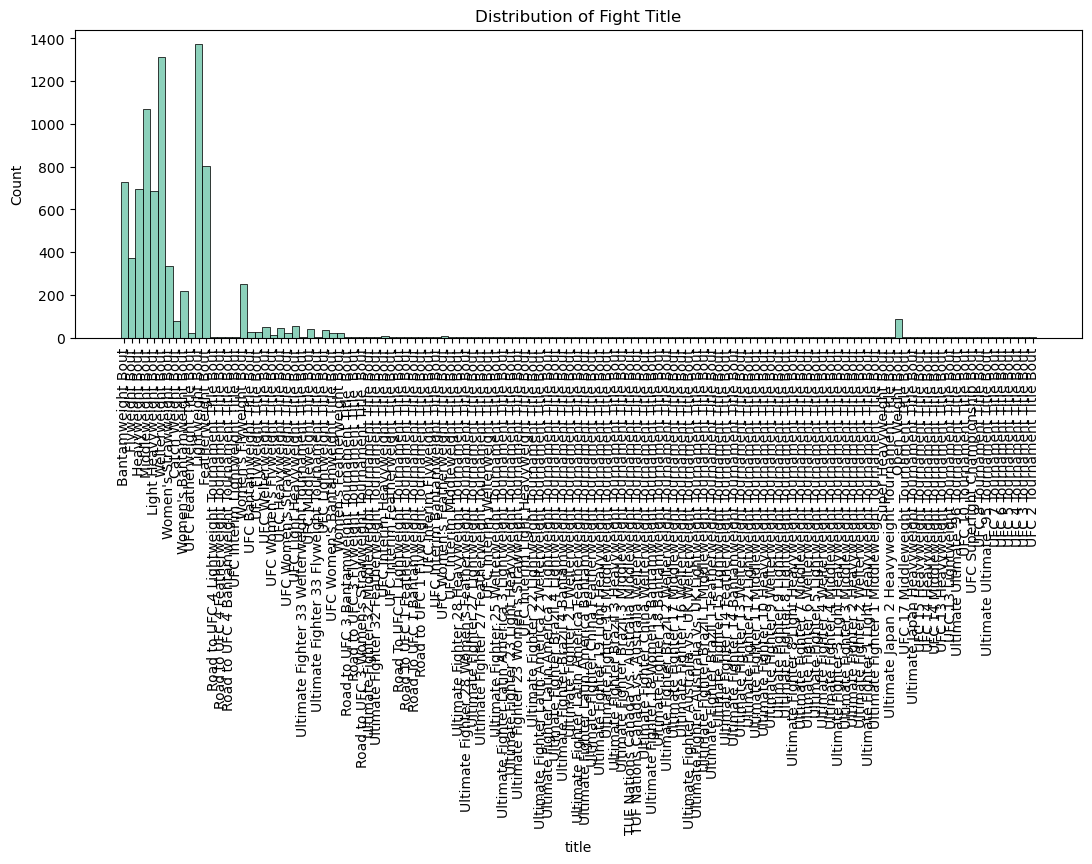

In [184]:
fig = plt.figure(figsize=(13, 4))

sns.histplot(data=fight_stats, x='title')
plt.title('Distribution of Fight Title')
plt.xticks(rotation=90);

In [147]:
fight_stats.isna().sum()

Unnamed: 0                               0
fighter_id                               0
date                                     0
location                                 0
title                                    0
method                                   0
round                                    0
time                                     0
time_format                              0
ref                                     26
details                                 74
red_outcome                              0
blue_outcome                             0
red_nickname                          2366
blue_nickname                         2422
red_fighter                              0
blue_fighter                             0
red_fighter_kd                           0
blue_fighter_kd                          0
red_fighter_sig_str_perc                 0
blue_fighter_sig_str_perc                0
red_fighter_td_perc                      0
blue_fighter_td_perc                     0
red_fighter

## fighter_stats

In [148]:
fighter_stats = pd.read_csv(config.PATH + '/ufc-stats/data/scraped_data/fighter_stats_raw.csv')

fighter_stats.head()

,Unnamed: 0,name,nickname,wins,losses,draws,height,weight,reach,stance,dob,sig_str_pm,str_acc,strikes_abs_pm,sig_str_def,td_avg,td_acc,td_def,sub_avg
0,0,Tom Aaron,NaN,5,3,0,--,155 lbs.,--,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,1,Danny Abbadi,The Assassin,4,6,0,"5' 11""",155 lbs.,--,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
2,2,Nariman Abbasov,Bayraktar,28,4,0,"5' 8""",155 lbs.,"66""",Orthodox,"Feb 01, 1994",3.00,20%,5.67,46%,0.00,0%,66%,0.0
3,3,Darion Abbey,NaN,9,5,0,"6' 2""",265 lbs.,"80""",Orthodox,"Feb 25, 1993",8.44,50%,14.06,28%,0.00,0%,0%,0.0
4,4,David Abbott,Tank,10,15,0,"6' 0""",265 lbs.,--,Switch,"Apr 26, 1965",1.35,30%,3.55,38%,1.07,33%,66%,0.0


In [149]:
fighter_stats = fighter_stats.drop(columns=fighter_stats.columns[0])

fighter_stats.columns

Index(['name', 'nickname', 'wins', 'losses', 'draws', 'height', 'weight',
       'reach', 'stance', 'dob', 'sig_str_pm', 'str_acc', 'strikes_abs_pm',
       'sig_str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg'],
      dtype='object')

In [150]:
# query = "SELECT * FROM fighter_stats"
# fighter_stats = pd.read_sql(query, engine)

# fighter_stats.head()

In [151]:
fighter_stats.shape

(4452, 18)

In [152]:
fighter_stats = fighter_stats.replace('--', np.nan)

In [153]:
fighter_stats.weight = fighter_stats.weight.str.replace(' lbs.', '').astype(np.float64)
fighter_stats.reach = fighter_stats.reach.str.replace('"', '').astype(np.float64)
fighter_stats.str_acc = fighter_stats.str_acc.str.replace('%', '').astype(np.float64)
fighter_stats.sig_str_def = fighter_stats.sig_str_def.str.replace('%', '').astype(np.float64)
fighter_stats.td_acc = fighter_stats.td_acc.str.replace('%', '').astype(np.float64)
fighter_stats.td_def = fighter_stats.td_def.str.replace('%', '').astype(np.float64)

In [154]:
fighter_stats.dob = fighter_stats.dob.map(lambda x: pd.to_datetime(x, format='%b %d, %Y'))

In [155]:
def inches_from_feet(x):
    if pd.isna(x):
        return np.nan
    else:
        y = x.split('\'')
        feet, inches = int(y[0]), int(y[1][:-1])
        return int(feet * 11 + inches)

In [156]:
fighter_stats.height = fighter_stats.height.map(lambda x: inches_from_feet(x))

In [157]:
fighter_stats.isna().sum()

name                 0
nickname          1981
wins                 0
losses               0
draws                0
height             316
weight              86
reach             1938
stance             847
dob                504
sig_str_pm           0
str_acc              0
strikes_abs_pm       0
sig_str_def          0
td_avg               0
td_acc               0
td_def               0
sub_avg              0
dtype: int64

In [158]:
fighter_stats.dtypes

name                      object
nickname                  object
wins                       int64
losses                     int64
draws                     object
height                   float64
weight                   float64
reach                    float64
stance                    object
dob               datetime64[ns]
sig_str_pm               float64
str_acc                  float64
strikes_abs_pm           float64
sig_str_def              float64
td_avg                   float64
td_acc                   float64
td_def                   float64
sub_avg                  float64
dtype: object

In [159]:
fighter_stats.wins = fighter_stats.wins.astype(int)
fighter_stats.losses = fighter_stats.losses.astype(int)
fighter_stats.sig_str_pm = fighter_stats.sig_str_pm.astype(np.float64)
fighter_stats.strikes_abs_pm = fighter_stats.strikes_abs_pm.astype(np.float64)
fighter_stats.td_avg = fighter_stats.td_avg.astype(np.float64)
fighter_stats.sub_avg = fighter_stats.sub_avg.astype(np.float64)

In [160]:
def sum_draws(x):
    pattern = pattern = '\((\d+) NC\)'
    match = re.search(pattern, x)
    if not match:
        return int(x)
    return int(match.group(1))

In [161]:
fighter_stats.draws = fighter_stats.draws.map(lambda x: sum_draws(x))

In [174]:
fighter_stats.height = fighter_stats.height.fillna(fighter_stats.height.mean())
fighter_stats.reach = fighter_stats.reach.fillna(fighter_stats.reach.mean())
fighter_stats.weight = fighter_stats.weight.fillna(fighter_stats.weight.mean())
fighter_stats.dob = fighter_stats.dob.fillna(fighter_stats.dob.median())
fighter_stats.nickname = fighter_stats.nickname.fillna('')

In [175]:
fighter_stats['total_fights'] = fighter_stats.wins + fighter_stats.losses + fighter_stats.draws

In [176]:
fighter_stats['birth_year'] = fighter_stats.dob.map(lambda x: x.year)
fighter_stats['birth_month'] = fighter_stats.dob.map(lambda x: x.month)
fighter_stats['birth_day'] = fighter_stats.dob.map(lambda x: x.day)

In [177]:
fighter_stats.stance.mode()[0]

'Orthodox'

In [180]:
stance_mode = fighter_stats.stance.mode()[0]
fighter_stats.stance = fighter_stats.stance.replace('', stance_mode)

In [181]:
fighter_stats.head()

,name,nickname,wins,losses,draws,height,weight,reach,stance,dob,sig_str_pm,str_acc,strikes_abs_pm,sig_str_def,td_avg,td_acc,td_def,sub_avg,total_fights,birth_year,birth_month,birth_day
0,Tom Aaron,,5,3,0,64.770793,155.0,71.556086,Orthodox,1978-07-13,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,8,1978,7,13
1,Danny Abbadi,The Assassin,4,6,0,66.000000,155.0,71.556086,Orthodox,1983-07-03,3.29,38.0,4.41,57.0,0.00,0.0,77.0,0.0,10,1983,7,3
2,Nariman Abbasov,Bayraktar,28,4,0,63.000000,155.0,66.000000,Orthodox,1994-02-01,3.00,20.0,5.67,46.0,0.00,0.0,66.0,0.0,32,1994,2,1
3,Darion Abbey,,9,5,0,68.000000,265.0,80.000000,Orthodox,1993-02-25,8.44,50.0,14.06,28.0,0.00,0.0,0.0,0.0,14,1993,2,25
4,David Abbott,Tank,10,15,0,66.000000,265.0,71.556086,Switch,1965-04-26,1.35,30.0,3.55,38.0,1.07,33.0,66.0,0.0,25,1965,4,26


In [182]:
fighter_stats.isna().sum()

name              0
nickname          0
wins              0
losses            0
draws             0
height            0
weight            0
reach             0
stance            0
dob               0
sig_str_pm        0
str_acc           0
strikes_abs_pm    0
sig_str_def       0
td_avg            0
td_acc            0
td_def            0
sub_avg           0
total_fights      0
birth_year        0
birth_month       0
birth_day         0
dtype: int64

## fighter_rankings

In [108]:
fighter_rankings = pd.read_csv(config.PATH + '/ufc-stats/data/scraped_data/fighter_rankings_raw.csv')

In [109]:
fighter_rankings.head()

,Unnamed: 0,fighter,ranking,weight_class


## Save to CSV

In [95]:
fighter_stats.to_csv(config.PATH + '/ufc-stats/data/clean_data/fighter_stats_clean.csv')

In [96]:
fight_stats.to_csv(config.PATH + '/ufc-stats/data/clean_data/fight_stats_clean.csv')

## Save to Database

In [97]:
from sqlalchemy import create_engine

In [98]:
# conn_str = f"mssql+pyodbc://{config.DB_SERVER}/{config.DB_NAME}?driver=ODBC+Driver+18+for+SQL+Server&trusted_connection=yes&TrustServerCertificate=yes"
# engine = create_engine(conn_str)

In [99]:
# fighter_stats.to_sql('fighter_stats', con=engine, if_exists='replace', index=False)
# print('Table (fighter_stats) created successfully!')

In [100]:
# fight_stats.to_sql('fight_stats', con=engine, if_exists='replace', index=False)
# print("Table (fight_stats) created successfully!")

## Exploratory Data Analysis (EDA)

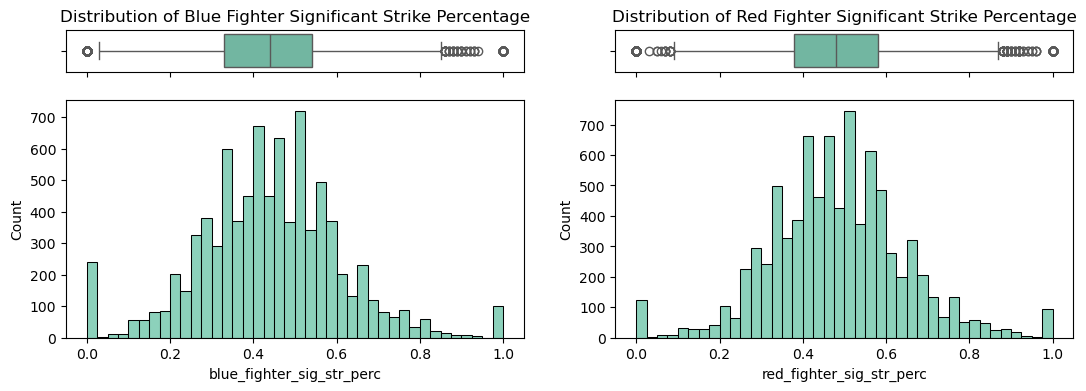

In [101]:
fig, ((bp1, bp2), (hist1, hist2)) = plt.subplots(2, 2, sharex=True, figsize=(13, 4), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(fight_stats.blue_fighter_sig_str_perc, orient='h', ax=bp1)
sns.histplot(data=fight_stats, x='blue_fighter_sig_str_perc', bins=40, ax=hist1)
bp1.set_title('Distribution of Blue Fighter Significant Strike Percentage')

sns.boxplot(fight_stats.red_fighter_sig_str_perc, orient='h', ax=bp2)
sns.histplot(data=fight_stats, x='red_fighter_sig_str_perc', bins=40, ax=hist2)
bp2.set_title('Distribution of Red Fighter Significant Strike Percentage');

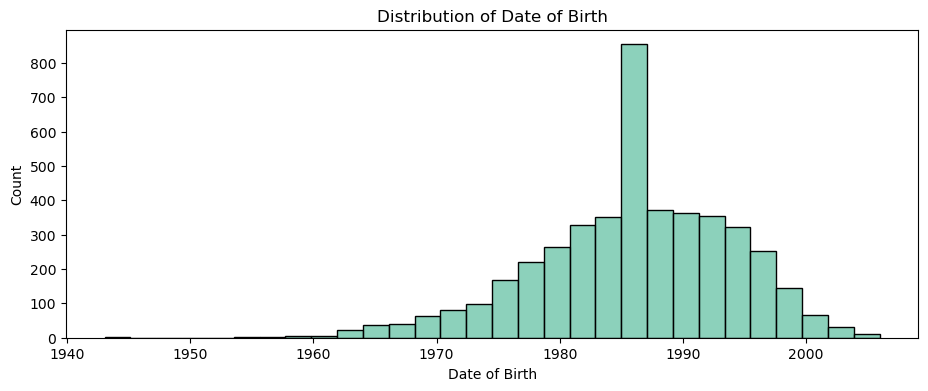

In [102]:
fig = plt.figure(figsize=(11, 4))

sns.histplot(data=fighter_stats, x='dob', bins=30)
plt.title('Distribution of Date of Birth')
plt.xlabel('Date of Birth');

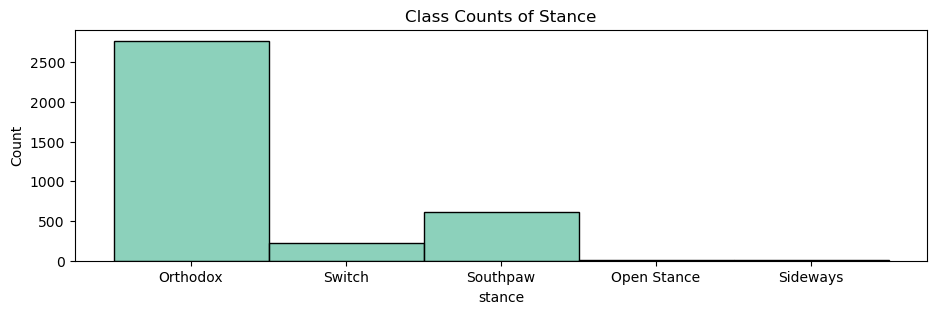

In [103]:
fig = plt.figure(figsize=(11, 3))
sns.histplot(data=fighter_stats, x='stance')
plt.title('Class Counts of Stance');

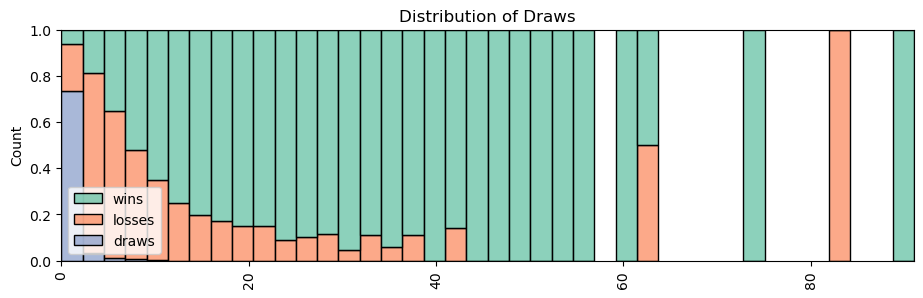

In [104]:
fig = plt.figure(figsize=(11,3))
mask = (fighter_stats.wins < 100) & (fighter_stats.losses < 100)
sns.histplot(data=fighter_stats.loc[mask, ['wins', 'losses', 'draws']], bins=40, multiple='fill')
plt.title('Distribution of Draws')
plt.xticks(rotation=90);

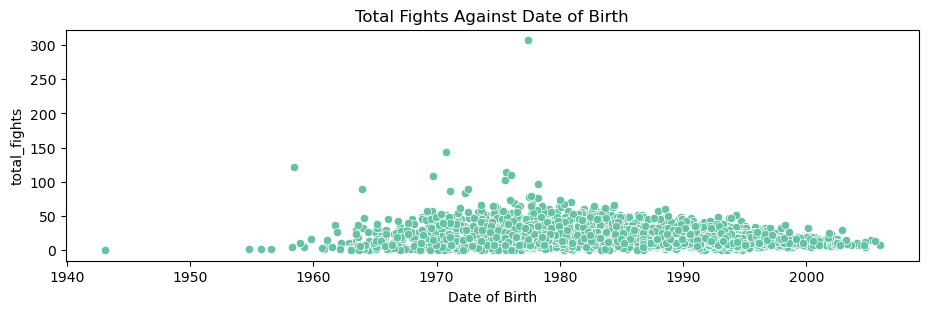

In [105]:
fig = plt.figure(figsize=(11, 3))
sns.scatterplot(data=fighter_stats, x='dob', y='total_fights')
plt.title('Total Fights Against Date of Birth')
plt.xlabel('Date of Birth');

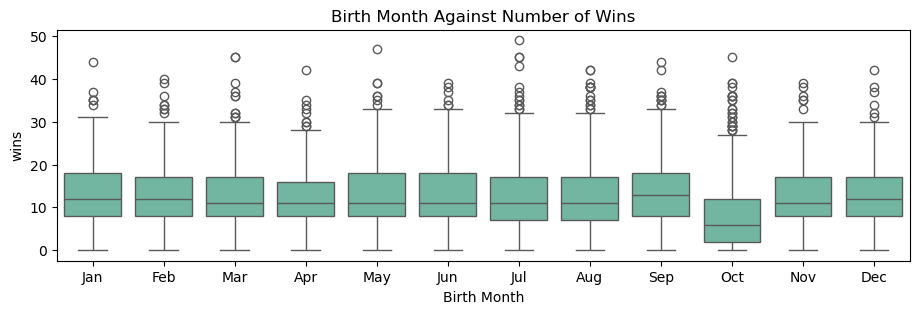

In [106]:
fig = plt.figure(figsize=(11, 3))
mask = (fighter_stats.wins < 50) & (fighter_stats.losses < 50)
sns.boxplot(data=fighter_stats[mask], x='birth_month', y='wins')
plt.title('Birth Month Against Number of Wins')
plt.xlabel('Birth Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

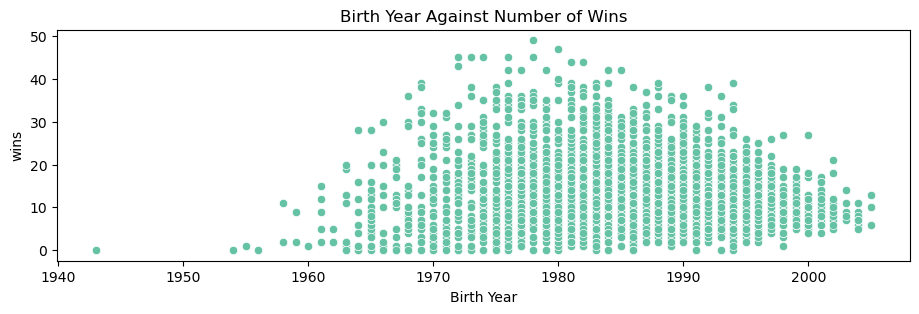

In [107]:
fig = plt.figure(figsize=(11, 3))
mask = (fighter_stats.wins < 50) & (fighter_stats.losses < 50)
sns.scatterplot(data=fighter_stats[mask], x='birth_year', y='wins')
plt.title('Birth Year Against Number of Wins')
plt.xlabel('Birth Year');